# Is there a relationship between number of passengers and distance
Following code reads uber_rides_processed.csv. It compares the no of rides taken by single passenger vs shared rides based on distance and time of the day. 
The input data does not include following information. 
Ride duration
 and whether shared rides passengers are in a group or strangers car pooling for the ride

Developer: Leena Chauhan
Project1: Question 3
Date: 16 Nov 2023

In [2]:
#Is there a relationship between number of passengers, ride duration and day of the week
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from datetime import datetime


# Study data files
uber_path = "Resources/uber_rides_processed.csv"

# Read the uber data and the clean data
uber_data = pd.read_csv(uber_path)
uber_data = uber_data[uber_data['passenger_count'] <= 10]
uber_data = uber_data[uber_data['year'] != 2008]
uber_data = uber_data[uber_data['fare_amount'] >= 2.5]
uber_data['road_distance']  = round(uber_data['road_distance'], 2)
uber_data = uber_data[uber_data['road_distance'] > 0]
uber_data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time,day,month,year,road_distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,15:52:06,7,5,2015,1.04
1,11.5,-73.965937,40.770992,-73.977657,40.762827,1,2014-10-23,5:05:47,23,10,2014,0.83
2,9.5,-74.007496,40.725907,-73.987605,40.738403,1,2013-02-28,8:32:27,28,2,2013,1.35
3,4.5,-73.974277,40.750318,-73.970525,40.756100,1,2012-07-31,10:32:50,31,7,2012,0.44
4,5.0,-73.982117,40.773972,-73.984437,40.761082,1,2012-10-22,17:52:00,22,10,2012,0.90


In [3]:
uber_data.value_counts('passenger_count')

passenger_count
1    133836
2     28537
5     13537
3      8620
6      4156
4      4139
Name: count, dtype: int64

In [4]:
uber_data['DateTime_str'] = uber_data['date'].astype(str) + " " + uber_data['time'].astype(str)
uber_data.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
date                  object
time                  object
day                    int64
month                  int64
year                   int64
road_distance        float64
DateTime_str          object
dtype: object

In [5]:
uber_data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time,day,month,year,road_distance,DateTime_str
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,15:52:06,7,5,2015,1.04,2015-05-07 15:52:06
1,11.5,-73.965937,40.770992,-73.977657,40.762827,1,2014-10-23,5:05:47,23,10,2014,0.83,2014-10-23 5:05:47
2,9.5,-74.007496,40.725907,-73.987605,40.738403,1,2013-02-28,8:32:27,28,2,2013,1.35,2013-02-28 8:32:27
3,4.5,-73.974277,40.750318,-73.970525,40.756100,1,2012-07-31,10:32:50,31,7,2012,0.44,2012-07-31 10:32:50
4,5.0,-73.982117,40.773972,-73.984437,40.761082,1,2012-10-22,17:52:00,22,10,2012,0.90,2012-10-22 17:52:00


In [6]:
date_format = '%Y-%m-%d %H:%M:%S'
uber_data['DateTime'] = datetime.today().strftime(date_format)
uber_data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time,day,month,year,road_distance,DateTime_str,DateTime
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,15:52:06,7,5,2015,1.04,2015-05-07 15:52:06,2023-11-19 13:43:14
1,11.5,-73.965937,40.770992,-73.977657,40.762827,1,2014-10-23,5:05:47,23,10,2014,0.83,2014-10-23 5:05:47,2023-11-19 13:43:14
2,9.5,-74.007496,40.725907,-73.987605,40.738403,1,2013-02-28,8:32:27,28,2,2013,1.35,2013-02-28 8:32:27,2023-11-19 13:43:14
3,4.5,-73.974277,40.750318,-73.970525,40.756100,1,2012-07-31,10:32:50,31,7,2012,0.44,2012-07-31 10:32:50,2023-11-19 13:43:14
4,5.0,-73.982117,40.773972,-73.984437,40.761082,1,2012-10-22,17:52:00,22,10,2012,0.90,2012-10-22 17:52:00,2023-11-19 13:43:14


In [7]:
uber_data['DateTime'] = pd.to_datetime(uber_data['DateTime_str'])
uber_data['Day_name'] = uber_data['DateTime'].dt.day_name()
uber_data.dtypes 

fare_amount                 float64
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
date                         object
time                         object
day                           int64
month                         int64
year                          int64
road_distance               float64
DateTime_str                 object
DateTime             datetime64[ns]
Day_name                     object
dtype: object

In [8]:
uber_data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time,day,month,year,road_distance,DateTime_str,DateTime,Day_name
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,15:52:06,7,5,2015,1.04,2015-05-07 15:52:06,2015-05-07 15:52:06,Thursday
1,11.5,-73.965937,40.770992,-73.977657,40.762827,1,2014-10-23,5:05:47,23,10,2014,0.83,2014-10-23 5:05:47,2014-10-23 05:05:47,Thursday
2,9.5,-74.007496,40.725907,-73.987605,40.738403,1,2013-02-28,8:32:27,28,2,2013,1.35,2013-02-28 8:32:27,2013-02-28 08:32:27,Thursday
3,4.5,-73.974277,40.750318,-73.970525,40.756100,1,2012-07-31,10:32:50,31,7,2012,0.44,2012-07-31 10:32:50,2012-07-31 10:32:50,Tuesday
4,5.0,-73.982117,40.773972,-73.984437,40.761082,1,2012-10-22,17:52:00,22,10,2012,0.90,2012-10-22 17:52:00,2012-10-22 17:52:00,Monday


In [9]:
def time_range(time):
    hour = datetime.strptime(time, date_format).hour
    if hour > 20:
        return "Night"
    elif hour > 16:
        return "Evening"
    elif hour > 12:
        return "Afternoon"
    elif hour > 8:
        return "Morning"
    elif hour > 4:
        return "EarlyMorning"
    else:
        return "Midnight"

In [10]:
uber_data['time_of_the_day'] = uber_data.DateTime_str.apply(lambda time: time_range(time))
uber_data.drop(['DateTime_str'], inplace=True, axis=1)
uber_data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time,day,month,year,road_distance,DateTime,Day_name,time_of_the_day
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,15:52:06,7,5,2015,1.04,2015-05-07 15:52:06,Thursday,Afternoon
1,11.5,-73.965937,40.770992,-73.977657,40.762827,1,2014-10-23,5:05:47,23,10,2014,0.83,2014-10-23 05:05:47,Thursday,EarlyMorning
2,9.5,-74.007496,40.725907,-73.987605,40.738403,1,2013-02-28,8:32:27,28,2,2013,1.35,2013-02-28 08:32:27,Thursday,EarlyMorning
3,4.5,-73.974277,40.750318,-73.970525,40.756100,1,2012-07-31,10:32:50,31,7,2012,0.44,2012-07-31 10:32:50,Tuesday,Morning
4,5.0,-73.982117,40.773972,-73.984437,40.761082,1,2012-10-22,17:52:00,22,10,2012,0.90,2012-10-22 17:52:00,Monday,Evening


In [11]:
distance_bins = [0, 1, 2, 5, 10, 20, 100]

# Create the names for the bins
group_names = ["less than 1km", "less than 2km", "less than 5km", "less than 10km", "less than 20km", "over 20km"]
uber_data["distance_bins"] = pd.cut(uber_data["road_distance"], distance_bins, labels=group_names, include_lowest=True)
uber_data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time,day,month,year,road_distance,DateTime,Day_name,time_of_the_day,distance_bins
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,15:52:06,7,5,2015,1.04,2015-05-07 15:52:06,Thursday,Afternoon,less than 2km
1,11.5,-73.965937,40.770992,-73.977657,40.762827,1,2014-10-23,5:05:47,23,10,2014,0.83,2014-10-23 05:05:47,Thursday,EarlyMorning,less than 1km
2,9.5,-74.007496,40.725907,-73.987605,40.738403,1,2013-02-28,8:32:27,28,2,2013,1.35,2013-02-28 08:32:27,Thursday,EarlyMorning,less than 2km
3,4.5,-73.974277,40.750318,-73.970525,40.756100,1,2012-07-31,10:32:50,31,7,2012,0.44,2012-07-31 10:32:50,Tuesday,Morning,less than 1km
4,5.0,-73.982117,40.773972,-73.984437,40.761082,1,2012-10-22,17:52:00,22,10,2012,0.90,2012-10-22 17:52:00,Monday,Evening,less than 1km


# Analyze single passenger uber rides
#### Get the trend of distance tranvelled by single passenger over the years

In [12]:
# Separate DF for single passenger and multiple passengers
df_single = uber_data[uber_data['passenger_count'] == 1]
df_single.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time,day,month,year,road_distance,DateTime,Day_name,time_of_the_day,distance_bins
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,15:52:06,7,5,2015,1.04,2015-05-07 15:52:06,Thursday,Afternoon,less than 2km
1,11.5,-73.965937,40.770992,-73.977657,40.762827,1,2014-10-23,5:05:47,23,10,2014,0.83,2014-10-23 05:05:47,Thursday,EarlyMorning,less than 1km
2,9.5,-74.007496,40.725907,-73.987605,40.738403,1,2013-02-28,8:32:27,28,2,2013,1.35,2013-02-28 08:32:27,Thursday,EarlyMorning,less than 2km
3,4.5,-73.974277,40.750318,-73.970525,40.756100,1,2012-07-31,10:32:50,31,7,2012,0.44,2012-07-31 10:32:50,Tuesday,Morning,less than 1km
4,5.0,-73.982117,40.773972,-73.984437,40.761082,1,2012-10-22,17:52:00,22,10,2012,0.90,2012-10-22 17:52:00,Monday,Evening,less than 1km


In [13]:
df_single.value_counts('year')

year
2012    21882
2013    21293
2011    20701
2014    20400
2009    20119
2010    19978
2015     9463
Name: count, dtype: int64

### No of single passenger rides vs Distance

In [14]:
g_single = pd.DataFrame(df_single.groupby(['year', 'distance_bins']).count())
g_single.reset_index(inplace = True)
g_single.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'date', 'time', 'day', 'month', 'road_distance', 'DateTime', 'Day_name', 'time_of_the_day'], inplace=True, axis=1)
g_single = g_single.rename(columns={"fare_amount": "No_of_rides"})
g_single.head()

,year,distance_bins,No_of_rides
0,2009,less than 1km,7422
1,2009,less than 2km,6537
2,2009,less than 5km,4714
3,2009,less than 10km,1121
4,2009,less than 20km,310


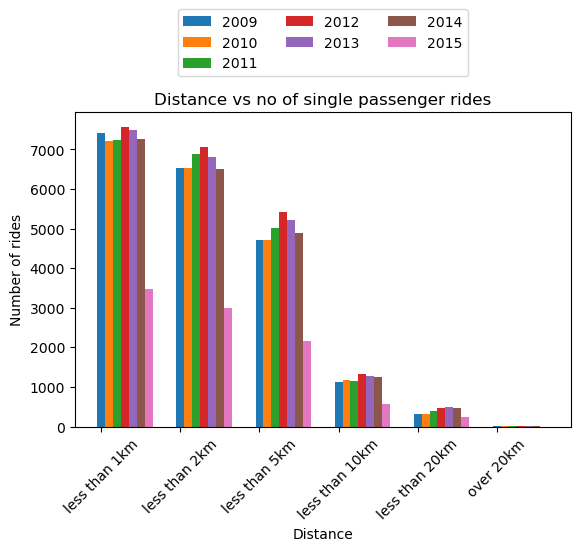

In [16]:
X = ['less than 1km','less than 2km','less than 5km','less than 10km', 'less than 20km', 'over 20km'] 

Y_2009 = g_single.loc[g_single['year'] == 2009]
Y_2009.set_index('distance_bins', inplace=True)
y_axis_2009 = Y_2009['No_of_rides']

Y_2010 = g_single.loc[g_single['year'] == 2010]
Y_2010.set_index('distance_bins', inplace=True)
y_axis_2010 = Y_2010['No_of_rides']

Y_2011 = g_single.loc[g_single['year'] == 2011]
Y_2011.set_index('distance_bins', inplace=True)
y_axis_2011 = Y_2011['No_of_rides']

Y_2012 = g_single.loc[g_single['year'] == 2012]
Y_2012.set_index('distance_bins', inplace=True)
y_axis_2012 = Y_2012['No_of_rides']

Y_2013 = g_single.loc[g_single['year'] == 2013]
Y_2013.set_index('distance_bins', inplace=True)
y_axis_2013 = Y_2013['No_of_rides']

Y_2014 = g_single.loc[g_single['year'] == 2014]
Y_2014.set_index('distance_bins', inplace=True)
y_axis_2014 = Y_2014['No_of_rides']

Y_2015 = g_single.loc[g_single['year'] == 2015]
Y_2015.set_index('distance_bins', inplace=True)
y_axis_2015 = Y_2015['No_of_rides']

x = np.arange(len(X))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots(layout='constrained')

plt.bar(x, y_axis_2009, 0.1, label = '2009') 
plt.bar(x + 0.1, y_axis_2010, 0.1, label = '2010') 
plt.bar(x + 0.2, y_axis_2011, 0.1, label = '2011') 
plt.bar(x + 0.3, y_axis_2012, 0.1, label = '2012') 
plt.bar(x + 0.4, y_axis_2013, 0.1, label = '2013') 
plt.bar(x + 0.5, y_axis_2014, 0.1, label = '2014') 
plt.bar(x + 0.6, y_axis_2015, 0.1, label = '2015') 
  
plt.xticks(x, X, rotation=45) 
plt.xlabel("Distance") 
plt.ylabel("Number of rides") 
plt.title("Distance vs no of single passenger rides") 

pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width, pos.height * 0.85])
ax.legend(
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.35),
    ncol=3, 
)
plt.show() 
fig.savefig("Analysis/Q3_1.png")

#### No of single passenger rides vs day of week - time of the day breakdown

In [17]:
#df_single.head()
df_single.value_counts('passenger_count')

passenger_count
1    133836
Name: count, dtype: int64

In [18]:
g_single = pd.DataFrame(df_single.groupby(['Day_name', 'time_of_the_day']).count())
g_single.reset_index(inplace = True)
g_single.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'date', 'time', 'day', 'month', 'year', 'DateTime', 'road_distance', 'distance_bins'], inplace=True, axis=1)
g_single = g_single.rename(columns={"fare_amount": "No_of_rides"})
g_single.head()

,Day_name,time_of_the_day,No_of_rides
0,Friday,Afternoon,4562
1,Friday,EarlyMorning,4079
2,Friday,Evening,4148
3,Friday,Midnight,3411
4,Friday,Morning,3695


In [19]:

early_morning = g_single.loc[g_single['time_of_the_day'] == 'EarlyMorning']
early_morning = early_morning.rename(columns={"No_of_rides": "EarlyMorning"})
early_morning.drop(['time_of_the_day'], inplace=True, axis=1)

morning = g_single.loc[g_single['time_of_the_day'] == 'Morning']
morning = morning.rename(columns={"No_of_rides": "Morning"})
morning.drop(['time_of_the_day'], inplace=True, axis=1)

df = pd.merge(early_morning, morning, how="left", on=["Day_name", "Day_name"])

afternoon = g_single.loc[g_single['time_of_the_day'] == 'Afternoon']
afternoon = afternoon.rename(columns={"No_of_rides": "Afternoon"})
afternoon.drop(['time_of_the_day'], inplace=True, axis=1)

df = pd.merge(df, afternoon, how="left", on=["Day_name", "Day_name"])

evening = g_single.loc[g_single['time_of_the_day'] == 'Evening']
evening = evening.rename(columns={"No_of_rides": "Evening"})
evening.drop(['time_of_the_day'], inplace=True, axis=1)

df = pd.merge(df, evening, how="left", on=["Day_name", "Day_name"])

night = g_single.loc[g_single['time_of_the_day'] == 'Night']
night = night.rename(columns={"No_of_rides": "Night"})
night.drop(['time_of_the_day'], inplace=True, axis=1)

df = pd.merge(df, night, how="left", on=["Day_name", "Day_name"])

midnight = g_single.loc[g_single['time_of_the_day'] == 'Midnight']
midnight = midnight.rename(columns={"No_of_rides": "Midnight"})
midnight.drop(['time_of_the_day'], inplace=True, axis=1)

df = pd.merge(df, midnight, how="left", on=["Day_name", "Day_name"])
df

,Day_name,EarlyMorning,Morning,Afternoon,Evening,Night,Midnight
0,Friday,4079,3695,4562,4148,1925,3411
1,Monday,3560,3411,4233,2663,523,3012
2,Saturday,3353,3542,3939,4086,2230,1777
3,Sunday,3144,3235,3394,2291,516,1437
4,Thursday,4104,3719,4872,4028,1106,3585
5,Tuesday,4013,3710,4714,3303,704,3391
6,Wednesday,4138,3718,4752,3549,756,3508


#### Time of the day has been broken down in to 6 4-hour time periods as follows
#####  0:0:0 to 3:59:39 Midnight
#####  4:0:0 to 7:59:59 Early Morning
#####  8:0:0 to 11:59:59 Morning
#####  12:0:0 to 15:59:59 Afternoon
#####  16:0:0 to 19:59:59 Evening
#####  20:0:0 to 23:59:59 Night

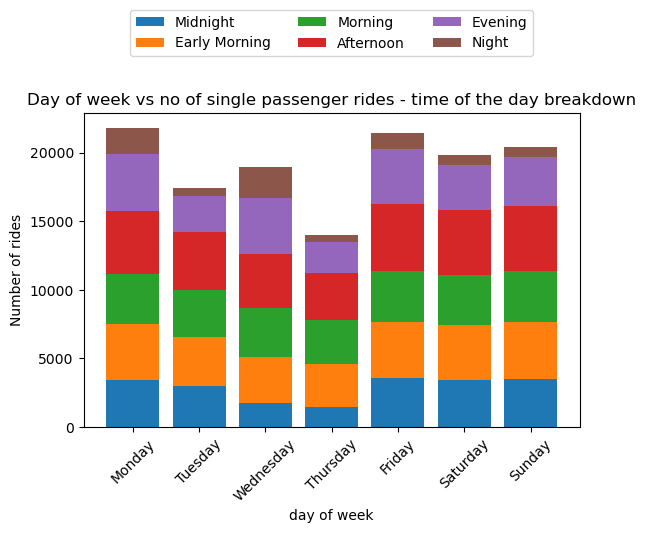

In [20]:
X = ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'] 
x = np.arange(len(X))  # the label locations

y1 = df['Midnight']
y2 = df['EarlyMorning']
y3 = df['Morning']
y4 = df['Afternoon']
y5 = df['Evening']
y6 = df['Night']

fig, ax = plt.subplots(layout='constrained')
plt.bar(x, y1, label = 'Midnight') 
plt.bar(x, y2, bottom=y1, label = 'Early Morning') 
plt.bar(x, y3, bottom=y1+y2, label = 'Morning') 
plt.bar(x, y4, bottom=y1+y2+y3, label = 'Afternoon') 
plt.bar(x, y5, bottom=y1+y2+y3+y4, label = 'Evening') 
plt.bar(x, y6, bottom=y1+y2+y3+y4+y5, label = 'Night') 
  
plt.xticks(x, X, rotation=45) 
plt.xlabel("day of week") 
plt.ylabel("Number of rides") 
plt.title("Day of week vs no of single passenger rides - time of the day breakdown") 

pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width, pos.height * 0.85])
ax.legend(
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.35),
    ncol=3, 
)
plt.show() 
fig.savefig("Analysis/Q3_2.png")

# Analyze more than 1 passenger uber rides

In [21]:
# Repeat for rides with more than one passenger
df_share = uber_data[uber_data['passenger_count'] > 1]
df_share.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time,day,month,year,road_distance,DateTime,Day_name,time_of_the_day,distance_bins
135635,5.3,-74.005498,40.739775,-73.997220,40.732645,2,2010-02-13,21:55:46,13,2,2010,0.66,2010-02-13 21:55:46,Saturday,Night,less than 1km
135636,5.3,-73.979303,40.784958,-73.973257,40.793523,2,2009-04-04,18:59:00,4,4,2009,0.67,2009-04-04 18:59:00,Saturday,Evening,less than 1km
135637,13.0,-73.996039,40.724246,-73.968075,40.760014,2,2014-12-13,20:07:42,13,12,2014,2.87,2014-12-13 20:07:42,Saturday,Evening,less than 5km
135638,10.1,-73.977315,40.779467,-73.989473,40.752282,2,2010-02-17,3:35:00,17,2,2010,1.98,2010-02-17 03:35:00,Wednesday,Midnight,less than 2km
135639,16.1,-73.988348,40.764157,-74.014053,40.702428,2,2009-01-09,12:25:00,9,1,2009,4.47,2009-01-09 12:25:00,Friday,Morning,less than 5km


### No of shared passenger rides vs Distance

In [22]:
g_share = pd.DataFrame(df_share.groupby(['year', 'distance_bins']).count())
g_share.reset_index(inplace = True)
g_share.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'date', 'time', 'day', 'month', 'road_distance', 'DateTime', 'Day_name', 'time_of_the_day'], inplace=True, axis=1)
g_share = g_share.rename(columns={"fare_amount": "No_of_rides"})
g_share.head()

,year,distance_bins,No_of_rides
0,2009,less than 1km,3473
1,2009,less than 2km,3115
2,2009,less than 5km,2285
3,2009,less than 10km,514
4,2009,less than 20km,187


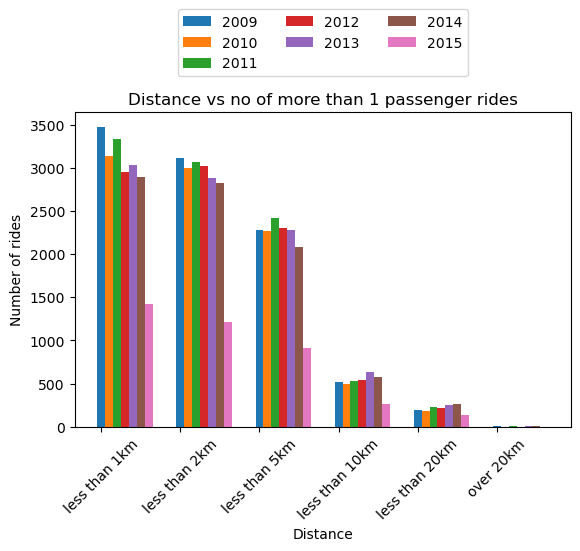

In [23]:
X = ['less than 1km','less than 2km','less than 5km','less than 10km', 'less than 20km', 'over 20km'] 

Y_2009 = g_share.loc[g_share['year'] == 2009]
Y_2009.set_index('distance_bins', inplace=True)
y_axis_2009 = Y_2009['No_of_rides']

Y_2010 = g_share.loc[g_share['year'] == 2010]
Y_2010.set_index('distance_bins', inplace=True)
y_axis_2010 = Y_2010['No_of_rides']

Y_2011 = g_share.loc[g_share['year'] == 2011]
Y_2011.set_index('distance_bins', inplace=True)
y_axis_2011 = Y_2011['No_of_rides']

Y_2012 = g_share.loc[g_share['year'] == 2012]
Y_2012.set_index('distance_bins', inplace=True)
y_axis_2012 = Y_2012['No_of_rides']

Y_2013 = g_share.loc[g_share['year'] == 2013]
Y_2013.set_index('distance_bins', inplace=True)
y_axis_2013 = Y_2013['No_of_rides']

Y_2014 = g_share.loc[g_share['year'] == 2014]
Y_2014.set_index('distance_bins', inplace=True)
y_axis_2014 = Y_2014['No_of_rides']

Y_2015 = g_share.loc[g_share['year'] == 2015]
Y_2015.set_index('distance_bins', inplace=True)
y_axis_2015 = Y_2015['No_of_rides']

x = np.arange(len(X))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots(layout='constrained')

plt.bar(x, y_axis_2009, 0.1, label = '2009') 
plt.bar(x + 0.1, y_axis_2010, 0.1, label = '2010') 
plt.bar(x + 0.2, y_axis_2011, 0.1, label = '2011') 
plt.bar(x + 0.3, y_axis_2012, 0.1, label = '2012') 
plt.bar(x + 0.4, y_axis_2013, 0.1, label = '2013') 
plt.bar(x + 0.5, y_axis_2014, 0.1, label = '2014') 
plt.bar(x + 0.6, y_axis_2015, 0.1, label = '2015') 
  
plt.xticks(x, X, rotation=45) 
plt.xlabel("Distance") 
plt.ylabel("Number of rides") 
plt.title("Distance vs no of more than 1 passenger rides") 

pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width, pos.height * 0.85])
ax.legend(
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.35),
    ncol=3, 
)
plt.show() 
fig.savefig("Analysis/Q3_3.png")

#### Analysis:


#### No of more than 1 passenger rides vs day of week - time of the day breakdown

In [24]:
df_share.value_counts('passenger_count')

passenger_count
2    28537
5    13537
3     8620
6     4156
4     4139
Name: count, dtype: int64

In [25]:
g_share = pd.DataFrame(df_share.groupby(['Day_name', 'time_of_the_day']).count())
g_share.reset_index(inplace = True)
g_share.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'date', 'time', 'day', 'month', 'year', 'DateTime', 'road_distance', 'distance_bins'], inplace=True, axis=1)
g_share = g_share.rename(columns={"fare_amount": "No_of_rides"})
g_share.head()

,Day_name,time_of_the_day,No_of_rides
0,Friday,Afternoon,2398
1,Friday,EarlyMorning,1478
2,Friday,Evening,2538
3,Friday,Midnight,971
4,Friday,Morning,1493


In [26]:

early_morning = g_share.loc[g_share['time_of_the_day'] == 'EarlyMorning']
early_morning = early_morning.rename(columns={"No_of_rides": "EarlyMorning"})
early_morning.drop(['time_of_the_day'], inplace=True, axis=1)

morning = g_share.loc[g_share['time_of_the_day'] == 'Morning']
morning = morning.rename(columns={"No_of_rides": "Morning"})
morning.drop(['time_of_the_day'], inplace=True, axis=1)

df = pd.merge(early_morning, morning, how="left", on=["Day_name", "Day_name"])

afternoon = g_share.loc[g_share['time_of_the_day'] == 'Afternoon']
afternoon = afternoon.rename(columns={"No_of_rides": "Afternoon"})
afternoon.drop(['time_of_the_day'], inplace=True, axis=1)

df = pd.merge(df, afternoon, how="left", on=["Day_name", "Day_name"])

evening = g_share.loc[g_share['time_of_the_day'] == 'Evening']
evening = evening.rename(columns={"No_of_rides": "Evening"})
evening.drop(['time_of_the_day'], inplace=True, axis=1)

df = pd.merge(df, evening, how="left", on=["Day_name", "Day_name"])

night = g_share.loc[g_share['time_of_the_day'] == 'Night']
night = night.rename(columns={"No_of_rides": "Night"})
night.drop(['time_of_the_day'], inplace=True, axis=1)

df = pd.merge(df, night, how="left", on=["Day_name", "Day_name"])

midnight = g_share.loc[g_share['time_of_the_day'] == 'Midnight']
midnight = midnight.rename(columns={"No_of_rides": "Midnight"})
midnight.drop(['time_of_the_day'], inplace=True, axis=1)

df = pd.merge(df, midnight, how="left", on=["Day_name", "Day_name"])
df

,Day_name,EarlyMorning,Morning,Afternoon,Evening,Night,Midnight
0,Friday,1478,1493,2398,2538,1247,971
1,Monday,1302,1462,1816,1220,206,895
2,Saturday,1620,1928,2535,2765,1398,674
3,Sunday,1522,1852,1733,1095,244,615
4,Thursday,1408,1477,2106,1899,500,1014
5,Tuesday,1466,1433,1975,1581,277,1002
6,Wednesday,1467,1478,2037,1598,329,935


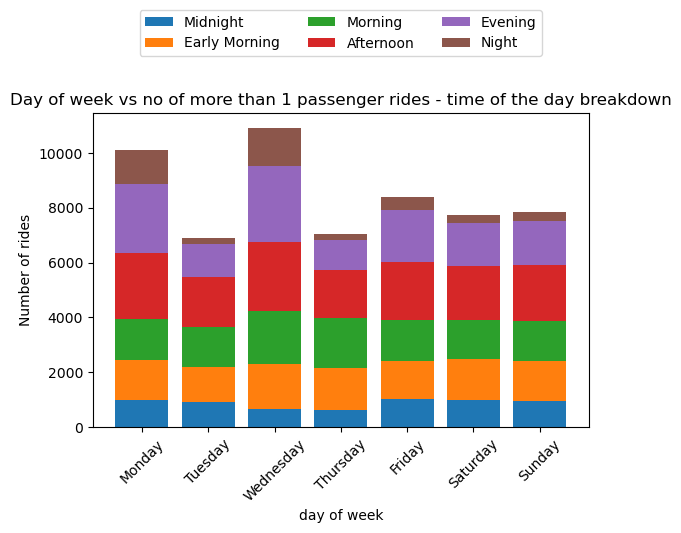

In [27]:
X = ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'] 
x = np.arange(len(X))  # the label locations

y1 = df['Midnight']
y2 = df['EarlyMorning']
y3 = df['Morning']
y4 = df['Afternoon']
y5 = df['Evening']
y6 = df['Night']

fig, ax = plt.subplots(layout='constrained')
plt.bar(x, y1, label = 'Midnight') 
plt.bar(x, y2, bottom=y1, label = 'Early Morning') 
plt.bar(x, y3, bottom=y1+y2, label = 'Morning') 
plt.bar(x, y4, bottom=y1+y2+y3, label = 'Afternoon') 
plt.bar(x, y5, bottom=y1+y2+y3+y4, label = 'Evening') 
plt.bar(x, y6, bottom=y1+y2+y3+y4+y5, label = 'Night') 
  
plt.xticks(x, X, rotation=45) 
plt.xlabel("day of week") 
plt.ylabel("Number of rides") 
plt.title("Day of week vs no of more than 1 passenger rides - time of the day breakdown") 

pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width, pos.height * 0.85])
ax.legend(
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.35),
    ncol=3, 
)
plt.show() 
fig.savefig("Analysis/Q3_4.png")